In [1]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=16, threads_per_worker=1)
client = Client(cluster)


/home/jomueller/micromamba/envs/mamba_josh/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34893 instead
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xhistogram.xarray import histogram

In [70]:
filenames = pd.read_csv('/projekt_agmwend/home_rad/Joshua/MasterArbeit/all_bands_filenames.csv')
filenames

ds = xr.open_dataset(filenames['2022-04-04'].iloc[0])

In [71]:
ds

<xarray.Dataset>
Dimensions:    (time: 29909, x: 640, y: 512)
Coordinates:
  * time       (time) datetime64[ns] 2022-04-04T07:19:51 ... 2022-04-04T15:50:43
Dimensions without coordinates: x, y
Data variables:
    lat        (time) float32 ...
    lon        (time) float32 ...
    alt        (time) float32 ...
    yaw        (time) float32 ...
    vza        (x, y) float32 ...
    vaa        (x, y) float32 ...
    BT_2D      (time, x, y) float32 ...
    BT_Center  (time) float32 ...
Attributes: (12/20)
    title:                   Two-dimensional cloud-top and sea-surface bright...
    research_flight_day:     20220404
    research_flight_number:  RF13
    version:                 Version v2.0 from 2023-02-20
    comment_1:               Band wavelength range: 12.00 +/- 0.50 micrometers  
    comment_2:               Flight direction is towards positive y-direction...
    ...                      ...
    institution:             University of Leipzig, Leipzig Institute for Met...
    author:                  Michael Schäfer, André Ehrlich, Anna Luebke, Jak...
    history:                 
    reference:               Schäfer, M., Wolf, K., Ehrlich, A., Hallbauer, C...
    created_on:              2023-03-08
    Conventions:             "CF-1.8"

In [5]:
ds_all = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/unified_velox_nadir_Filter_01.nc')

ds_gps = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/unified_gps_new.nc')


['lat', 'lon', 'alt', 'gs', 'hdg', 'roll', 'pitch']

In [15]:
ds_sel = ds_all.sel(time='2022-04-04')
ds_gps_sel = ds_gps.sel(time='2022-04-04')
ds_sel[list(ds_gps.data_vars)] = ds_gps_sel.interp_like(ds_sel, method='nearest')

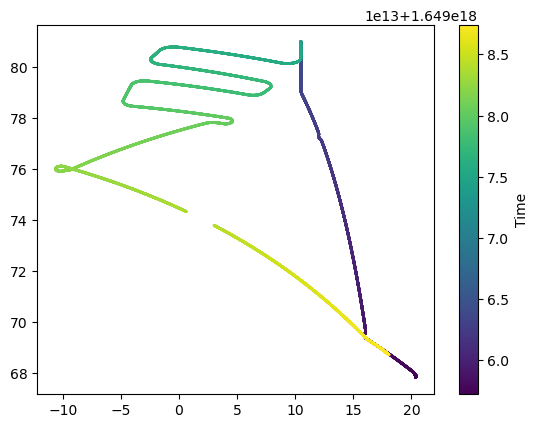

In [33]:
x = ds_sel['lon'].values
y = ds_sel['lat'].values
c = ds_sel['V100_mean'].values
t = ds_sel['time'].values

mask = (c > -30) & (y < 81)

x = x[mask]
y = y[mask]
c = c[mask]
t = t[mask]

fig, ax = plt.subplots()
im = ax.scatter(x, y, c=t, cmap='viridis', s=1)
plt.colorbar(
    im, label='Time'
)
plt.show()

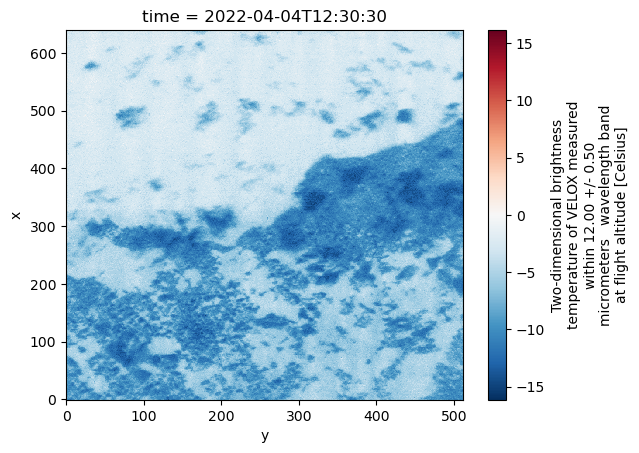

In [79]:
plt.figure()
ds.sel(time='2022-04-04T12:30:30').BT_2D.plot()
plt.show()

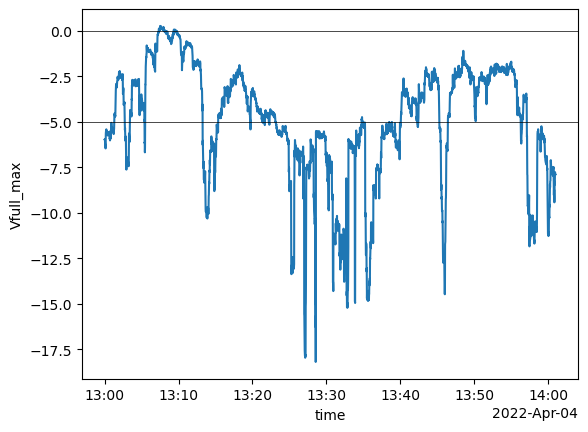

In [85]:
ds_subset =ds_sel.sel(time=slice('2022-04-04T13:00', '2022-04-4T14:00'))
#plt.scatter(ds_subset.lon, ds_subset.lat, c=ds_subset.V10_std, cmap='viridis')
#plt.show()
#plt.figure()
ds_subset.Vfull_max.plot()
plt.axhline(0, color='black', lw=0.5)
plt.axhline(-5, color='black', lw=0.5)
plt.show()